In [75]:
import pandas as pd

In [76]:
data_path = 'data/train.csv'
# Nombres de las columnas que deseas cargar (4, 5, 10 a 16)

# Leemos solo las columnas deseadas
data = pd.read_csv(data_path, usecols=[5,6,11,12,13,14,15,16])
data.head()


,Type of Travel,Class,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service
0,Personal Travel,Eco Plus,1,5,3,5,5,4
1,Business travel,Business,3,1,3,1,1,1
2,Business travel,Business,2,5,5,5,5,4
3,Business travel,Business,5,2,2,2,2,2
4,Business travel,Business,3,4,5,5,3,3


In [77]:
numericas = []
categoricas = []
nums = []

for i, col in enumerate(data.columns):
    tipo = "categórico" if data.dtypes[col] == object else "numérico"
    valores_perdidos = data[col].isnull().sum()  # Contar valores NaN
        
    if valores_perdidos > 0:
        print(f'La columna "{col}" tiene {valores_perdidos} valores perdidos.')
        
    # Añadimos la columna a la lista correspondiente
    if tipo == "numérico":
        numericas.append(col)
        
    else:
        categoricas.append(col)
        nums.append(i)

# Imprimimos las listas al final
print("Columnas categóricas:", categoricas)
print("\nColumnas numéricas:", numericas)
print(nums)


Columnas categóricas: ['Type of Travel', 'Class']

Columnas numéricas: ['Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service']
[0, 1]


In [78]:
for col in categoricas:
    print(f'Valores únicos en "{col}":', data[col].unique())
for col in categoricas:
    print(f'\nFrecuencia de valores en "{col}":\n', data[col].value_counts())


Valores únicos en "Type of Travel": ['Personal Travel' 'Business travel']
Valores únicos en "Class": ['Eco Plus' 'Business' 'Eco']

Frecuencia de valores en "Type of Travel":
 Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64

Frecuencia de valores en "Class":
 Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64


Como en type of travel solo hay dos binario y ya.
En Class como Eco Plus tiene muy pocas variables en comparacion lo voy a juntar con Eco y las voy a poner en binario tmbn.

In [79]:
# newdata = data.copy()  # Asegurar que newdata tiene los datos originales
# newdata['Type of Travel'] = newdata['Type of Travel'].map({'Business travel': 1, 'Personal Travel': 0})

# newdata['Class'] = newdata['Class'].replace({'Eco Plus': 'Eco'})  # Unimos "Eco Plus" con "Eco"
# newdata['Class'] = newdata['Class'].map({'Business': 1, 'Eco': 0})  # Convertimos en binario

# for col in categoricas:
#     print(f'Valores únicos en "{col}":', newdata[col].unique())
# for col in categoricas:
#     print(f'\nFrecuencia de valores en "{col}":\n', newdata[col].value_counts())


In [80]:
print(newdata[numericas].describe())


       Gate location  Food and drink  Online boarding  Seat comfort  \
count   14305.000000    14305.000000     14305.000000  14305.000000   
mean       -0.020731       -0.160398        -0.298433     -0.291215   
std         1.037052        1.045833         1.084685      1.049162   
min        -1.547358       -2.408477        -2.408510     -1.849359   
25%        -0.764620       -0.904184        -0.926509     -1.091247   
50%         0.018118       -0.152038        -0.185509     -0.333135   
75%         0.800857        0.600108         0.555492      0.424977   
max         1.583595        1.352255         1.296492      1.183090   

       Inflight entertainment  On-board service  
count            14305.000000      14305.000000  
mean                -0.169251         -0.160371  
std                  1.036414          1.066607  
min                 -2.519574         -1.849422  
25%                 -1.019055         -1.073162  
50%                 -0.268796         -0.296902  
75%       

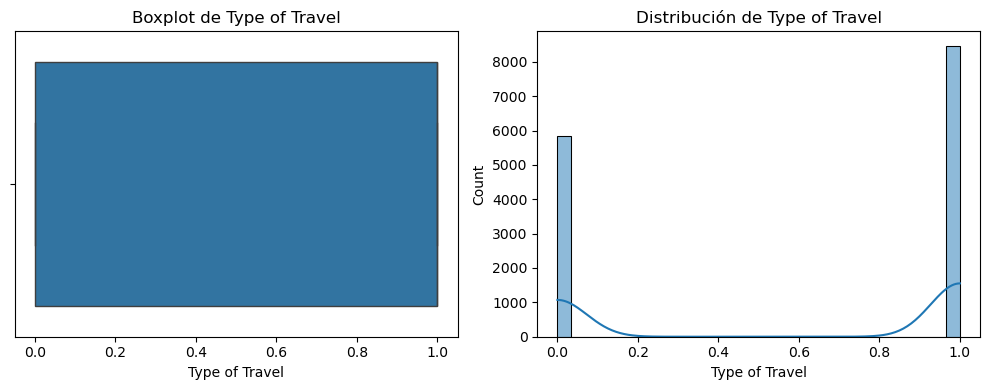

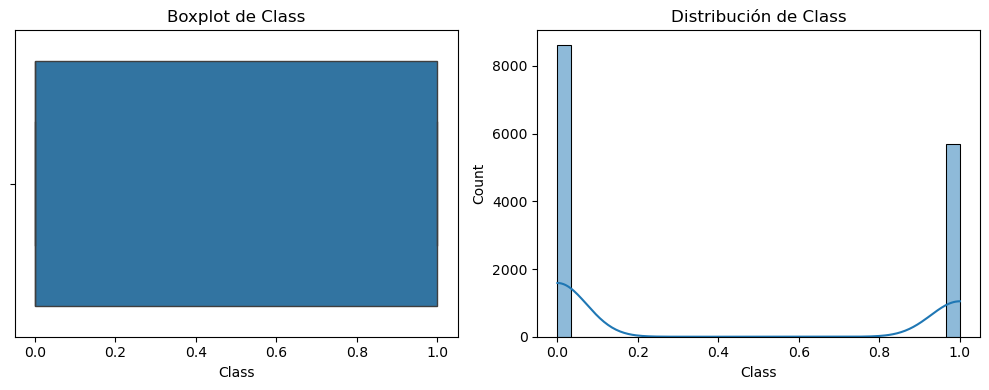

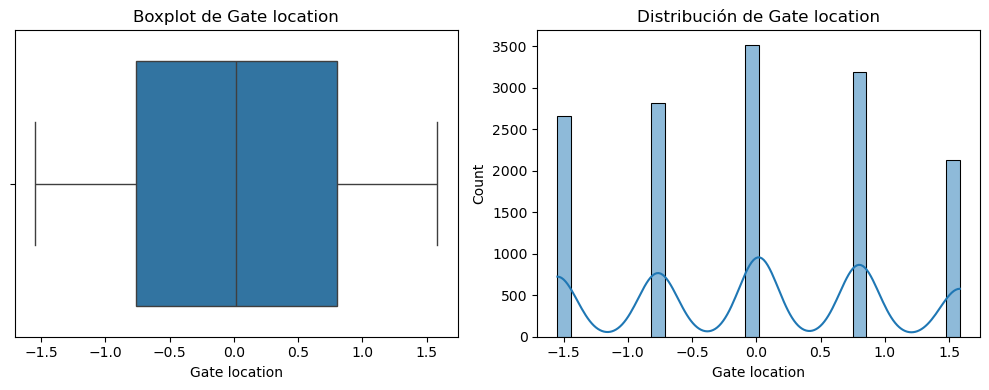

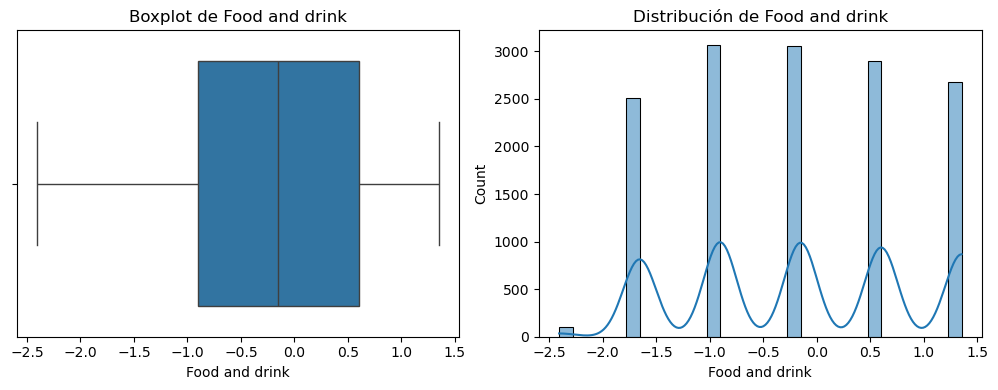

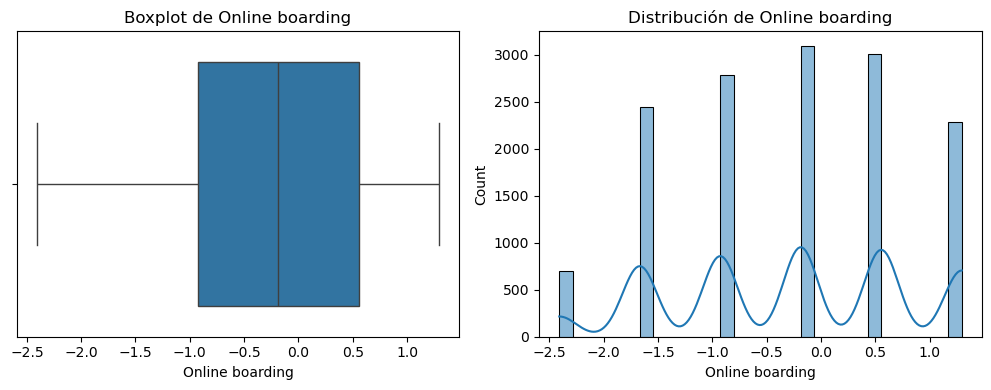

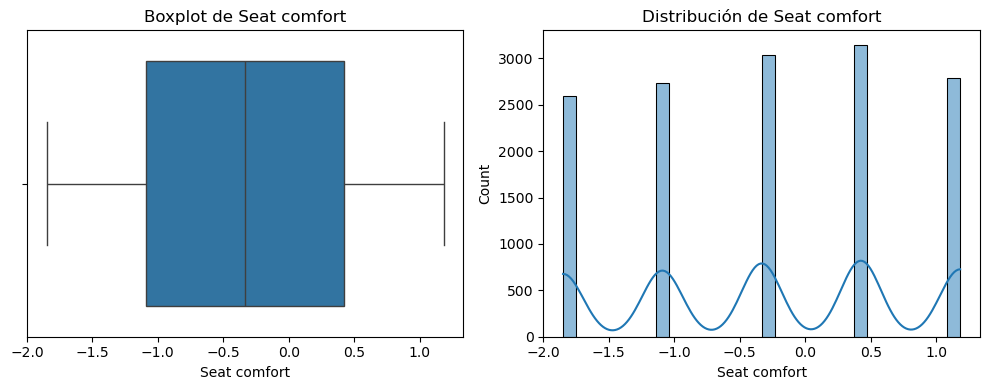

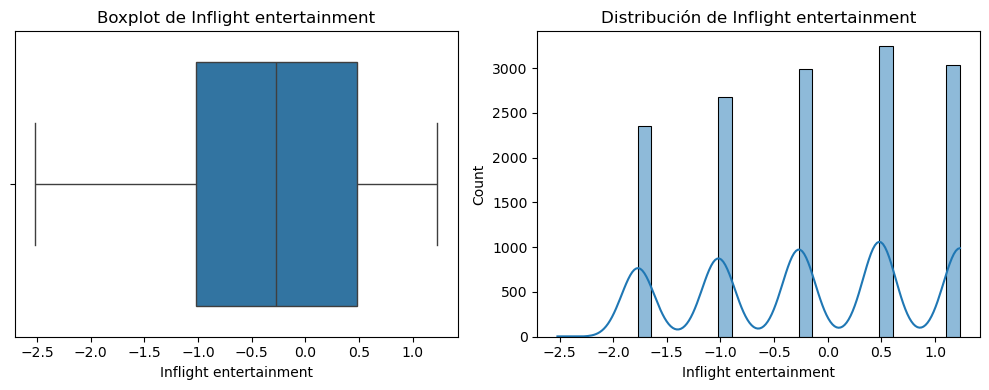

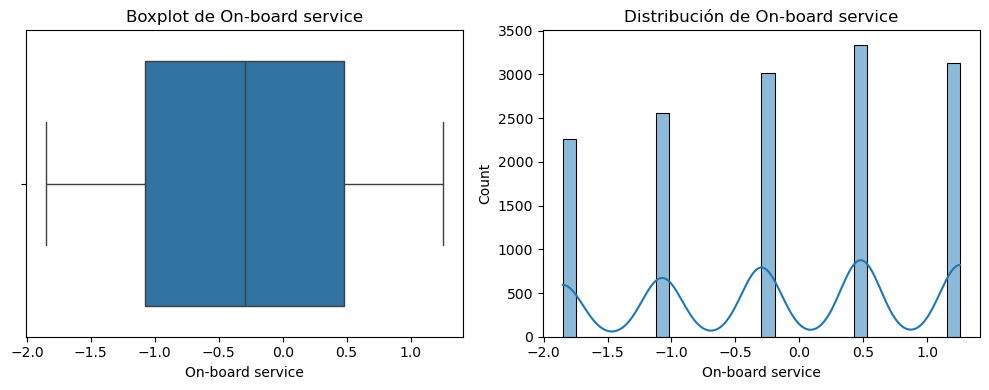

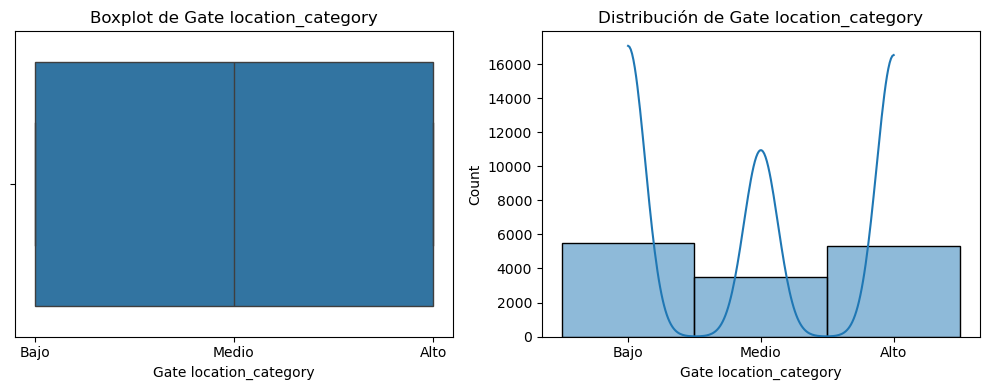

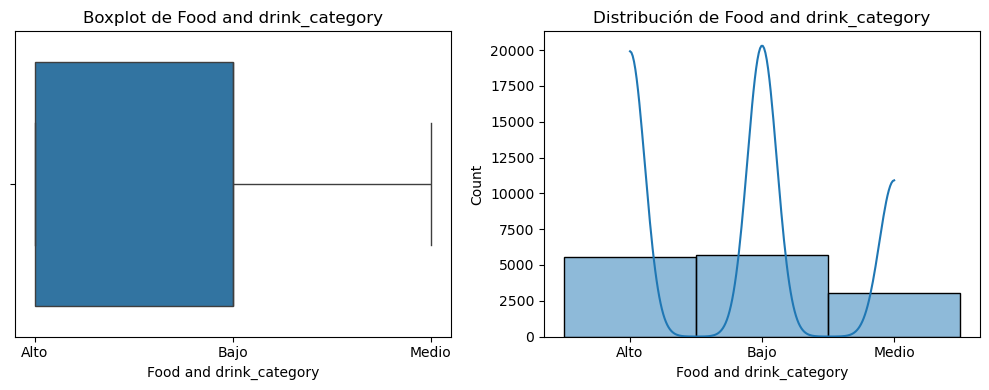

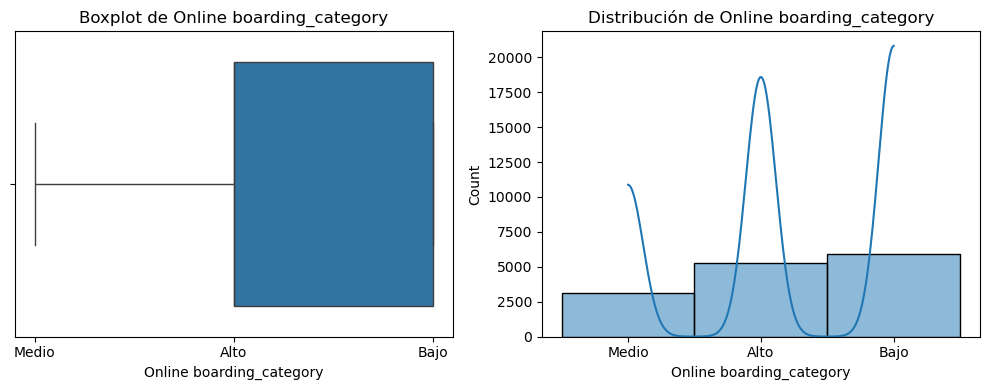

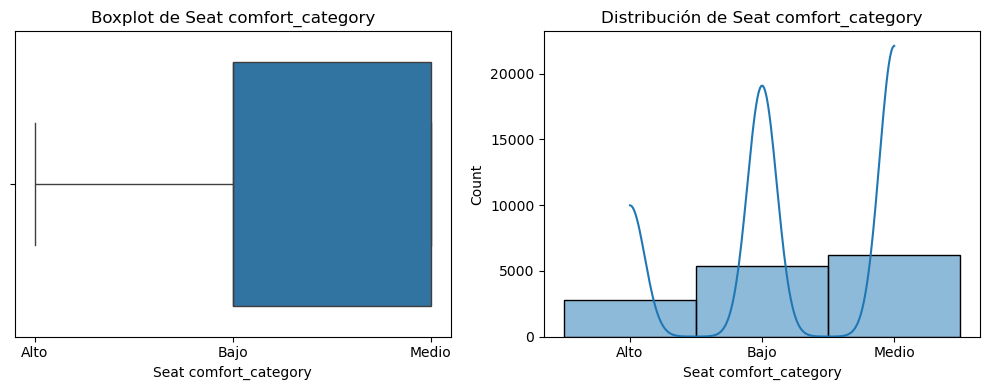

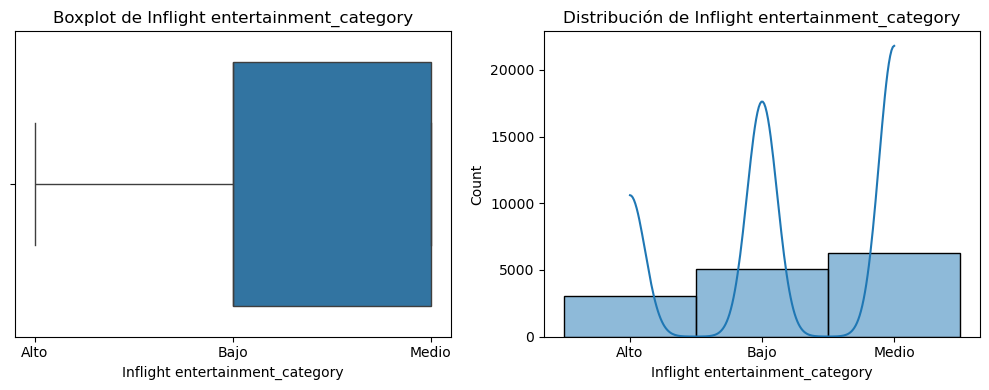

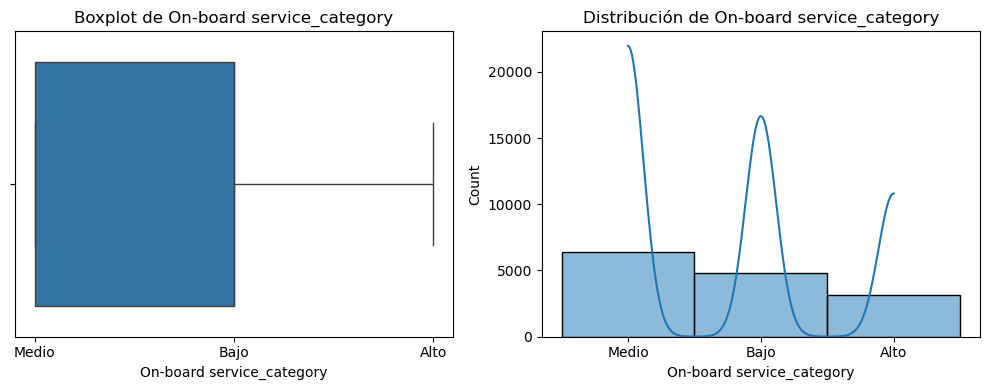

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in newdata:
    plt.figure(figsize=(10, 4))  # Ajustamos el tamaño para que se vea bien

    # Primer gráfico: Boxplot
    plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
    sns.boxplot(x=newdata[col])
    plt.title(f'Boxplot de {col}')

    # Segundo gráfico: Histograma
    plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
    sns.histplot(newdata[col], bins=30, kde=True)
    plt.title(f'Distribución de {col}')

    plt.tight_layout()  # Ajusta los espacios para que no se solapen
    plt.show()


In [82]:
# Para estadísticas descriptivas
descripcion = newdata[numericas].describe()

# Para ver la distribución de cada variable numérica
distribuciones = {}
for col in numericas:
    distribuciones[col] = newdata[col].value_counts().sort_index()

# Imprimir las estadísticas descriptivas
print("Estadísticas descriptivas de las variables numéricas:")
print(descripcion)

# Imprimir la distribución de cada variable numérica
print("\nDistribución de las variables numéricas:")
for col, distribucion in distribuciones.items():
    print(f"\nDistribución de {col}:")
    print(distribucion)



Estadísticas descriptivas de las variables numéricas:
       Gate location  Food and drink  Online boarding  Seat comfort  \
count   14305.000000    14305.000000     14305.000000  14305.000000   
mean       -0.020731       -0.160398        -0.298433     -0.291215   
std         1.037052        1.045833         1.084685      1.049162   
min        -1.547358       -2.408477        -2.408510     -1.849359   
25%        -0.764620       -0.904184        -0.926509     -1.091247   
50%         0.018118       -0.152038        -0.185509     -0.333135   
75%         0.800857        0.600108         0.555492      0.424977   
max         1.583595        1.352255         1.296492      1.183090   

       Inflight entertainment  On-board service  
count            14305.000000      14305.000000  
mean                -0.169251         -0.160371  
std                  1.036414          1.066607  
min                 -2.519574         -1.849422  
25%                 -1.019055         -1.073162  
50%   

In [83]:
# ======================================================================
# CÓDIGO COMPLETO DE PREPROCESAMIENTO (basado en los apuntes proporcionados)
# ======================================================================

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 1. Copia del dataset original y transformaciones iniciales
newdata = data.copy()

# Codificación de variables categóricas (Apuntes: Transformación de datos)
newdata['Type of Travel'] = newdata['Type of Travel'].map({'Business travel': 1, 'Personal Travel': 0})
newdata['Class'] = newdata['Class'].replace({'Eco Plus': 'Eco'})
newdata['Class'] = newdata['Class'].map({'Business': 1, 'Eco': 0})

# 2. Eliminación de outliers (Apuntes: Detección de valores fuera de rango)
outlier_columns = {
    'Gate location': 0,
    'Seat comfort': 0,
    'On-board service': 0
}

for col, value in outlier_columns.items():
    original_size = newdata.shape[0]
    newdata = newdata[newdata[col] != value]
    removed = original_size - newdata.shape[0]
    print(f'[Outliers] Eliminados {removed} casos en {col}')

# 3. Normalización Min-Max a rango [-1, 1] (Apuntes: Normalización de datos)
numeric_cols = [
    'Gate location', 'Food and drink', 'Online boarding',
    'Seat comfort', 'Inflight entertainment', 'On-board service'
]

scaler = MinMaxScaler(feature_range=(-1, 1))
newdata[numeric_cols] = scaler.fit_transform(newdata[numeric_cols])

# 4. Eliminación de duplicados (Apuntes: Integración de datos)
original_size = newdata.shape[0]
newdata = newdata.drop_duplicates()
print(f'\n[Duplicados] Registros eliminados: {original_size - newdata.shape[0]}')

# 5. Discretización adaptada al nuevo rango (Apuntes: Transformación de datos)
def discretize_value(x):
    if x <= -0.33: return 'Bajo'
    elif x <= 0.33: return 'Medio'
    else: return 'Alto'

for col in numeric_cols:
    newdata[f'{col}_category'] = newdata[col].apply(discretize_value)

# 6. Verificación final del preprocesamiento
print('\n' + '='*60 + '\nVerificación Post-Procesamiento:\n' + '='*60)

# 6.1. Estadísticas básicas
print('\nDistribución variables numéricas:')
print(newdata[numeric_cols].describe().round(2))

# 6.2. Rangos normalizados
print('\nRango efectivo por columna:')
for col in numeric_cols:
    min_val = newdata[col].min().round(2)
    max_val = newdata[col].max().round(2)
    print(f'- {col}: [{min_val}, {max_val}]')

# 6.3. Distribución categorías discretizadas
print('\n' + '-'*60 + '\nDistribución categorías:')
for col in numeric_cols:
    dist = newdata[f'{col}_category'].value_counts(normalize=True).round(2)
    print(f'\n{col}_category:\n{dist}')

# 6.4. Verificación variables categóricas originales (si existen)
categoricas = ['Type of Travel', 'Class']  # Actualizar según necesidad

print('\n' + '-'*60 + '\nVariables categóricas:')
for col in categoricas:
    print(f'\nValores únicos en {col}: {newdata[col].unique()}')
    print(f'Distribución:\n{newdata[col].value_counts()}')

# ======================================================================
# DATASET FINAL DISPONIBLE EN: newdata
# ======================================================================

[Outliers] Eliminados 1 casos en Gate location
[Outliers] Eliminados 1 casos en Seat comfort
[Outliers] Eliminados 3 casos en On-board service

[Duplicados] Registros eliminados: 89594

Verificación Post-Procesamiento:

Distribución variables numéricas:
       Gate location  Food and drink  Online boarding  Seat comfort  \
count       14305.00        14305.00         14305.00      14305.00   
mean           -0.02            0.20             0.14          0.03   
std             0.66            0.56             0.59          0.69   
min            -1.00           -1.00            -1.00         -1.00   
25%            -0.50           -0.20            -0.20         -0.50   
50%             0.00            0.20             0.20          0.00   
75%             0.50            0.60             0.60          0.50   
max             1.00            1.00             1.00          1.00   

       Inflight entertainment  On-board service  
count                14305.00          14305.00  
mean  